In [24]:
# package imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [26]:
# a) load the data
data = pd.read_csv("dataR2.csv")

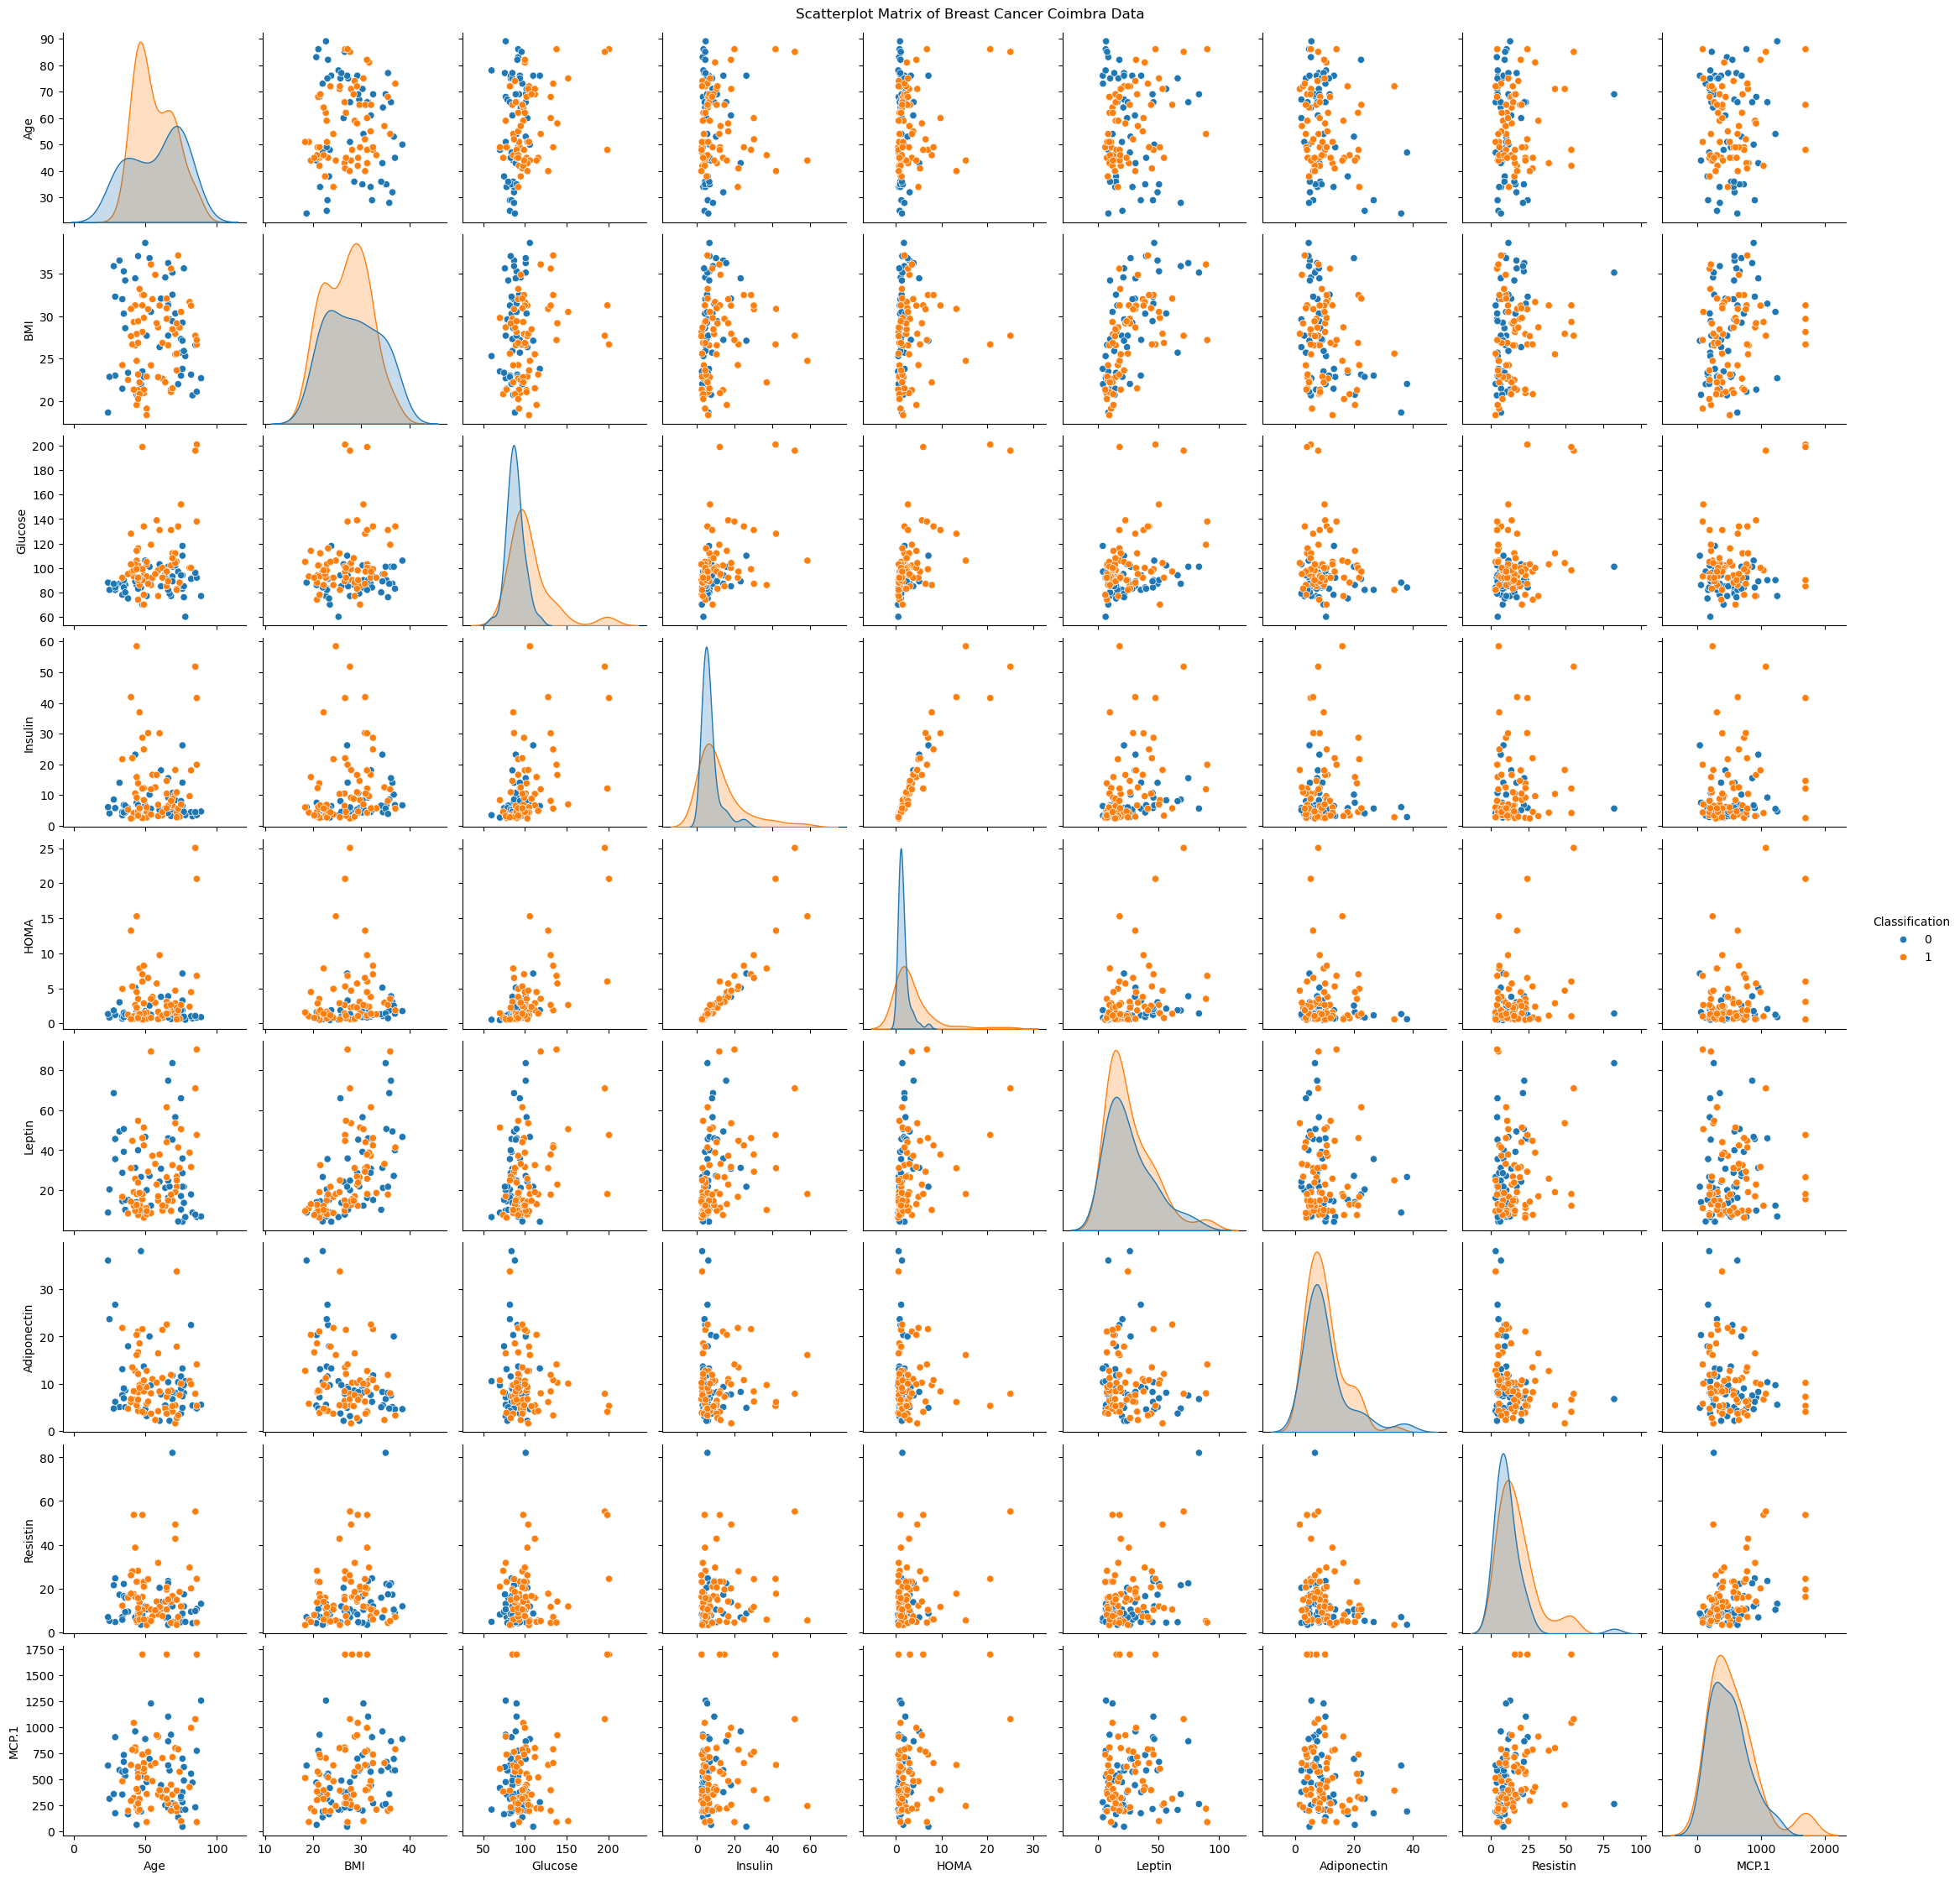

In [29]:
# b. i) Make a scatterplot matrix of the features in the dataset. Use color to show Classes 0 and 1.2
sb.pairplot(data, hue = "Classification", diag_kind = "kde")
plt.suptitle("Scatterplot Matrix of Breast Cancer Coimbra Data", y = 1)
plt.show()

In [32]:
# b. ii) Select the first 40 rows of Class 0 and the first 48 rows of Class 1 as the training set and
# the rest of the data as the test set.

class_0 = data[data["Classification"] == 0]
class_1 = data[data["Classification"] == 1]
train = pd.concat([class_0.iloc[:40], class_1.iloc[:48]])
test = pd.concat([class_0.iloc[40:], class_1.iloc[48:]])

# X represents predictors and Y represents targets, so separate them and only keep their Classification columns
x_train = train.drop(columns = ["Classification"])
y_train = train["Classification"]

x_test = test.drop(columns = ["Classification"])
y_test = test["Classification"]

# turn numbers into 0s and 1s
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [34]:
# c. i-ii) Use sklearn's KNN method to classify training and test data using majority polling and euclidean
# distance and plot the error rates

k_values = list(range(88, 0, -1))
train_errors = []
test_errors = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    knn.fit(X_train_scaled, y_train)

    # training error
    y_train_prediction = knn.predict(x_train_scaled)
    train = 1 - accuracy_score(y_train, y_train_prediction)
    train_errors.append(train)

    # tests error
    y_test_prediction = knn.predict(x_test_scaled)
    test = 1 - accuracy_score(y_test, y_test_prediction)
    test_errors.append(test)


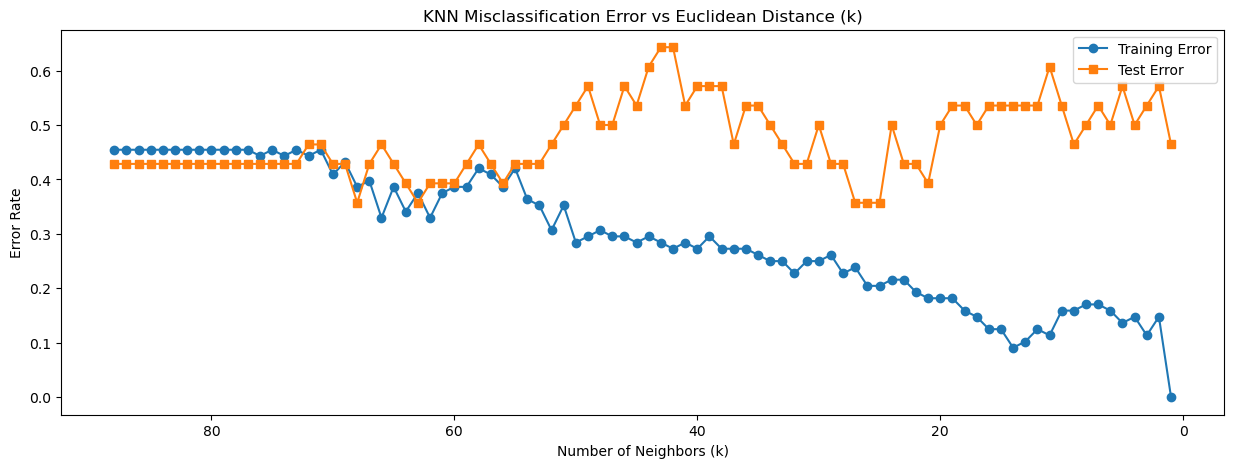

In [41]:
plt.figure(figsize=(15,5))
plt.plot(k_values, train_errors, label = "Training Error", marker = 'o')
plt.plot(k_values, test_errors, label = "Test Error", marker = 's')
plt.gca().invert_xaxis()
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Error Rate")
plt.title("KNN Misclassification Error vs Euclidean Distance (k)")
plt.legend()
plt.show()

In [45]:
# c. iii) Which k∗ is the most suitable k among those values?

best = k_values[np.argmin(test_errors)]
print("Most suitable k*: " + str(best))

Most suitable k*: 68


In [46]:
# d) replace euclidean distance with minkowski, and change to all 440 choices
parameters = [1, 2, 3, 4, 5]
best_pair = (None, None)
minkowski_error = float("inf")

for p in parameters:
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = p)
        knn.fit(x_train_scaled, y_train)
        
        y_test_prediction = knn.predict(x_test_scaled)
        test = 1 - accuracy_score(y_test, y_test_prediction)

        if test < minkowski_error:
            minkowski_error = test
            best_pair = (k, p)

In [48]:
print("Best (k*, p*): " + str(best_pair))
print("Test error: {:.4f}".format(min_error))

Best (k*, p*): (51, 1)
Test error: 0.3214
